In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
demo_df = pd.read_csv("demographics.csv")

In [36]:
nta_pop_map = {}
for i in range(len(demo_df)):
    nta = demo_df["nta_code"].iloc[i]
    pop = demo_df["population"].iloc[i]
    nta_pop_map[nta] = pop

In [8]:
df = pd.read_csv('green_rides_nta_counts_jack.csv')
df['type'] = 'green'
df = df.append(pd.read_csv('yellow_rides_nta_counts_jack.csv'), ignore_index=True)

df.loc[df['type'].isnull(), 'type'] = 'yellow'
df.loc[df['type']=='yellow', 'count'] = df['count']*20
df.loc[df['type']=='green', 'count'] = df['count']*5

df = df.append(pd.read_csv('uber_2015_nta_counts_jack.csv'), ignore_index=True)
df = df.append(pd.read_csv('uber_2014_nta_counts_jack.csv'), ignore_index=True)
df.loc[df['type'].isnull(), 'type'] = 'uber'

df.head()

,Date Index,NTA Code,count,type
0,4,BK09,20735,green
1,4,BK17,5490,green
2,4,BK19,450,green
3,4,BK21,890,green
4,4,BK23,120,green


In [9]:
df[df['type']=='uber']['Date Index'].unique()

array([13, 14, 15, 16, 17, 18,  4,  5,  6,  7,  8,  9])

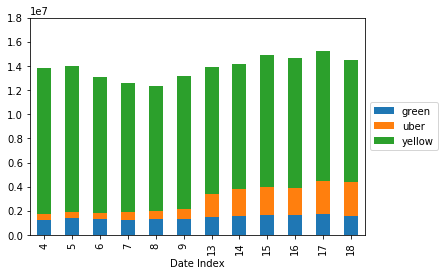

In [10]:
df.groupby(['Date Index', 'type'])['count'].sum().unstack().plot(ylim=[0,18000000], kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [120]:
len(good_df)

28

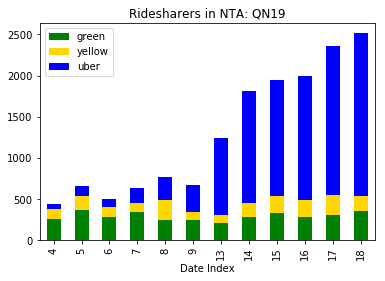

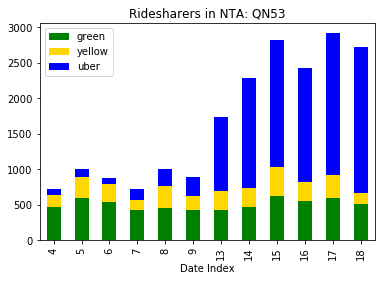

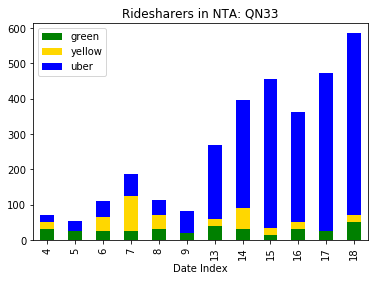

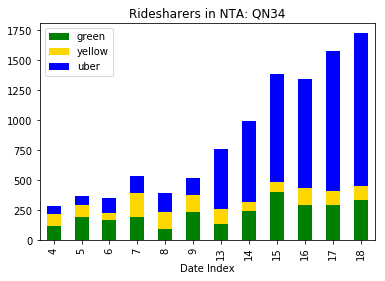

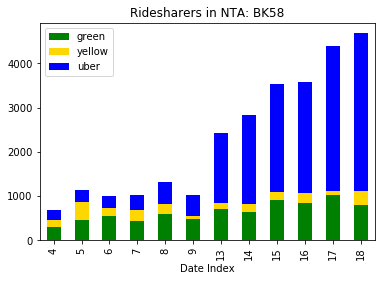

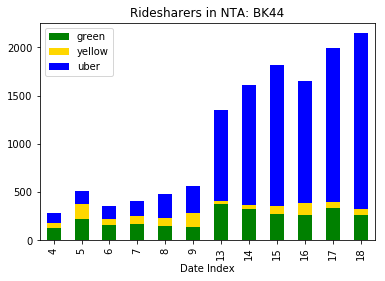

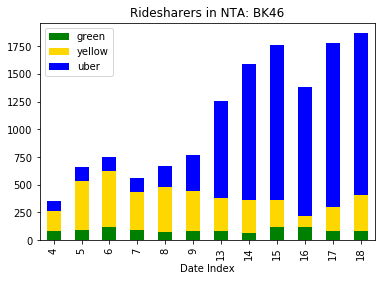

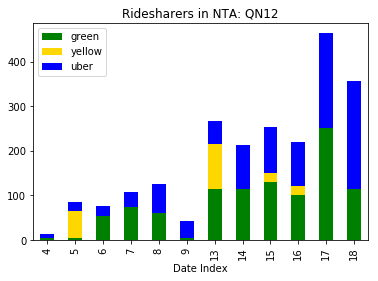

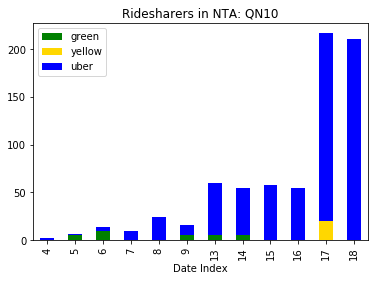

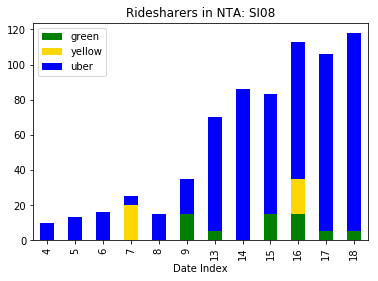

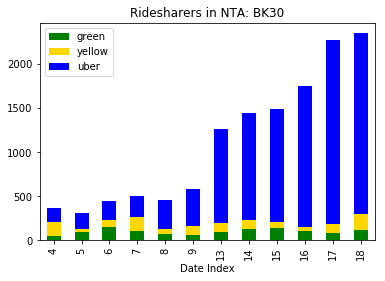

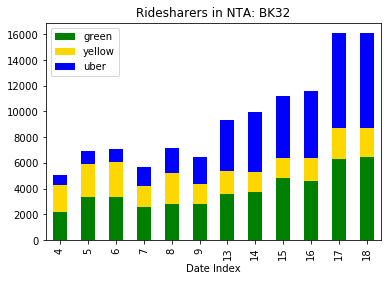

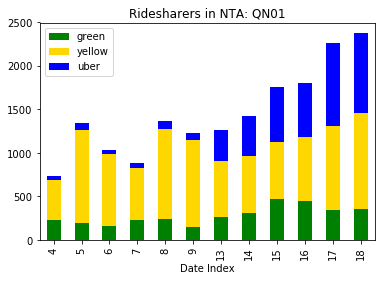

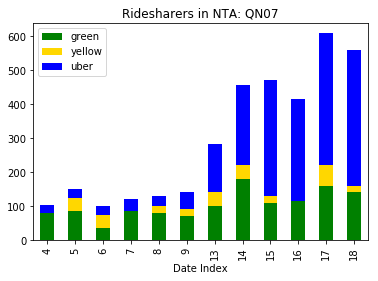

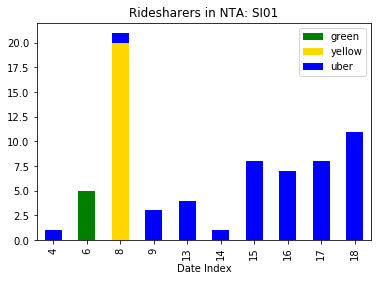

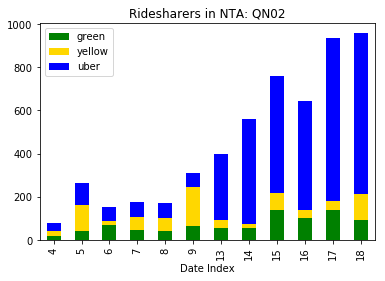

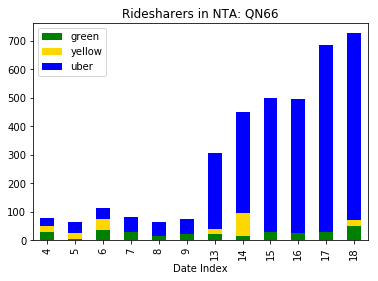

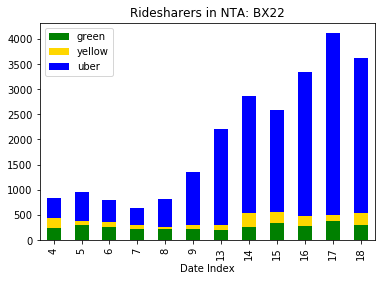

KeyError: "['green'] not in index"

In [125]:
#df.groupby(['date', 'type'])['count'].sum().unstack()[['green', 'yellow', 'uber']].plot(ylim=[0,18000000], kind='bar', stacked=True, color=['green', 'yellow', 'blue'],
for nta_code in good_df["NTA Code"]:
    df[df["NTA Code"]== nta_code].groupby(['Date Index', 'type'])['count'].sum().unstack()[['green', 'yellow', 'uber']].plot(title="Ridesharers in NTA: "+nta_code, color=['green', 'gold', 'blue'],kind='bar', stacked=True)
    plt.legend(loc='top right')
    plt.savefig("NTA uber increase: "+ nta_code+".png", dpi=500)
    plt.show()

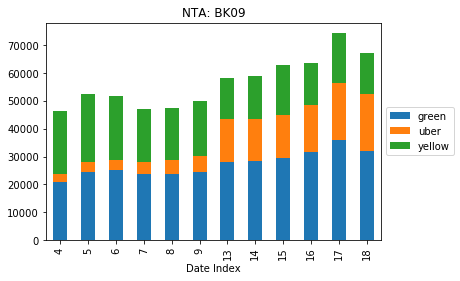

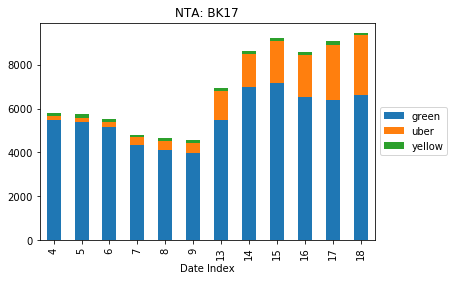

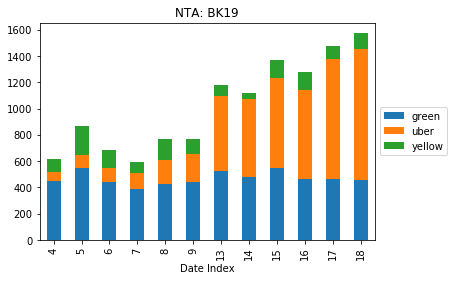

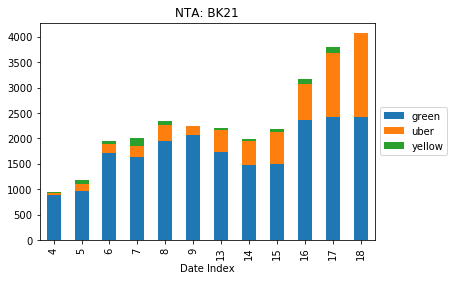

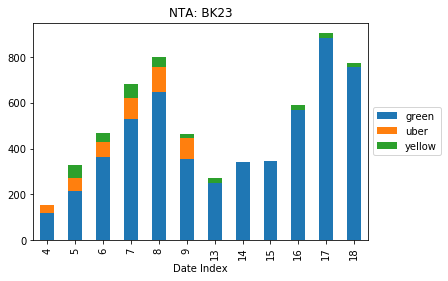

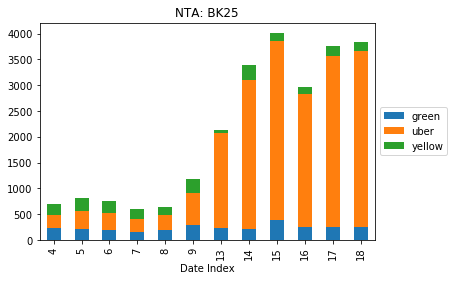

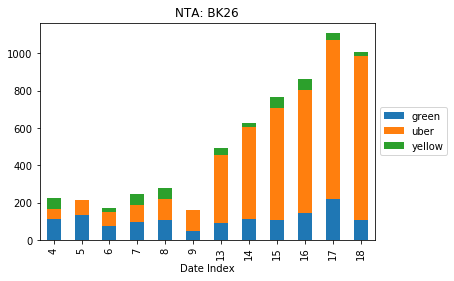

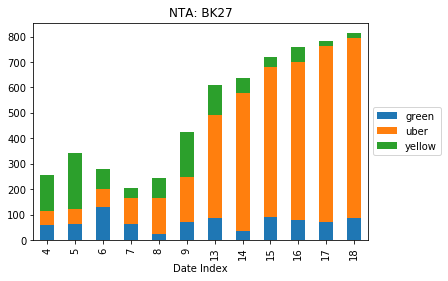

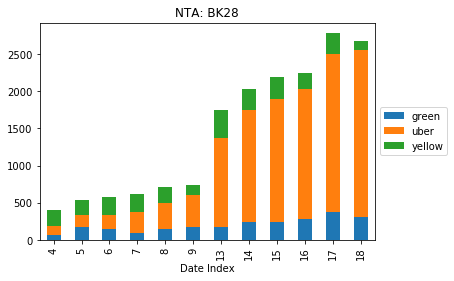

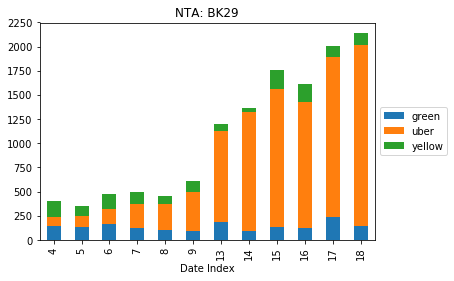

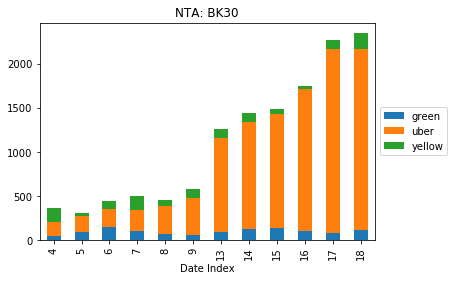

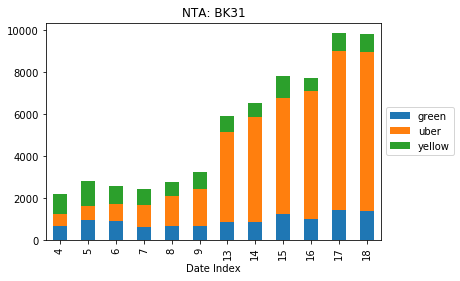

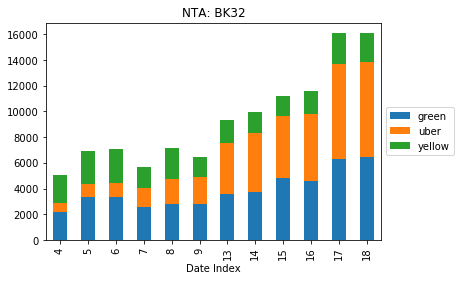

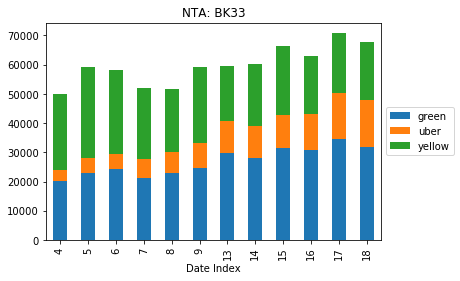

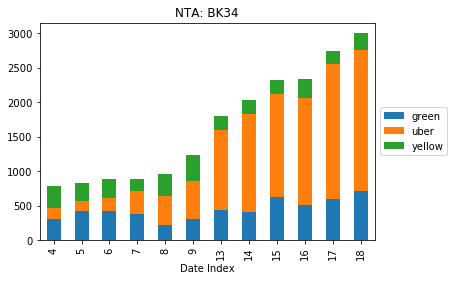

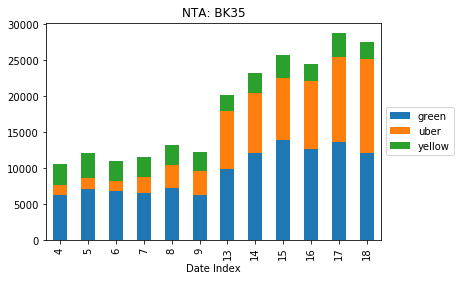

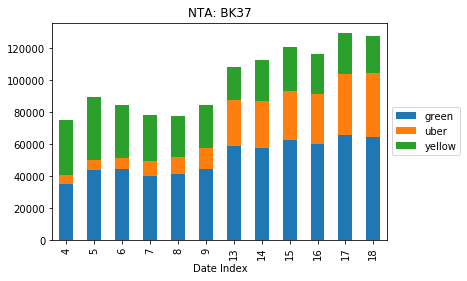

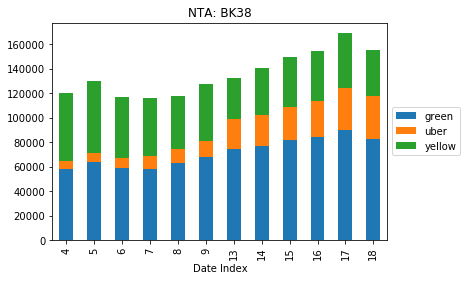

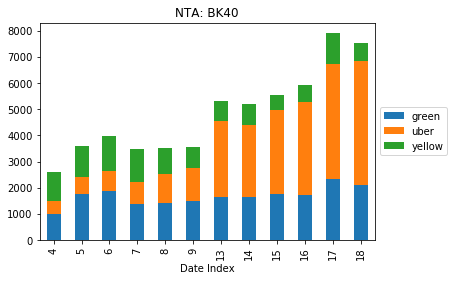

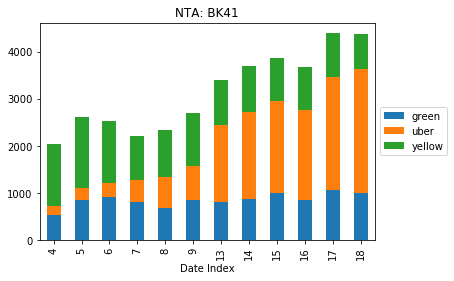

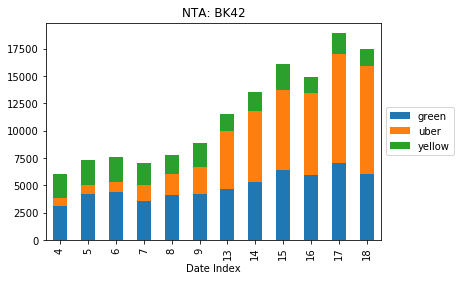

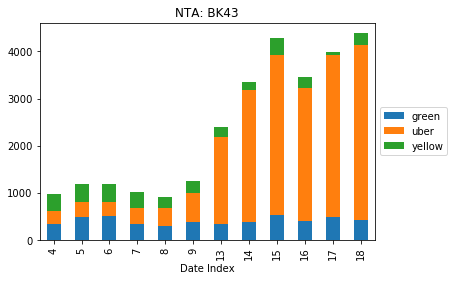

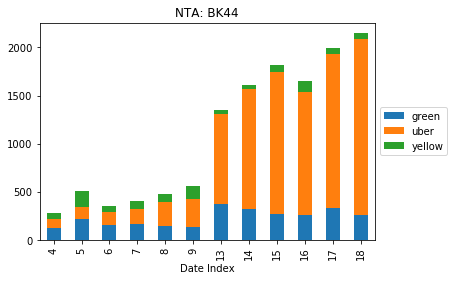

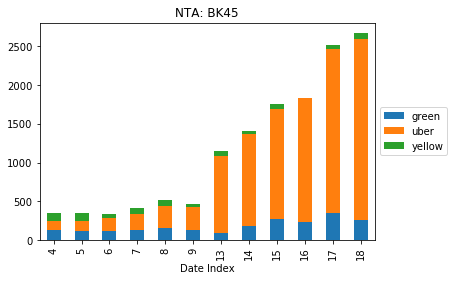

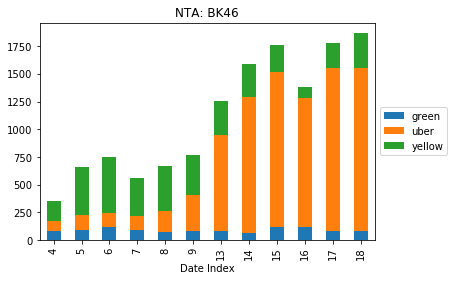

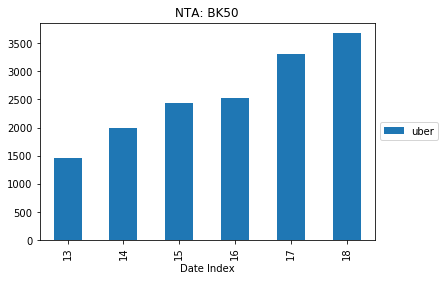

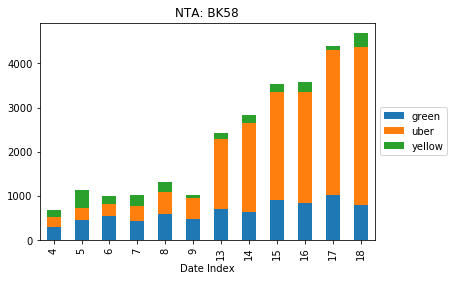

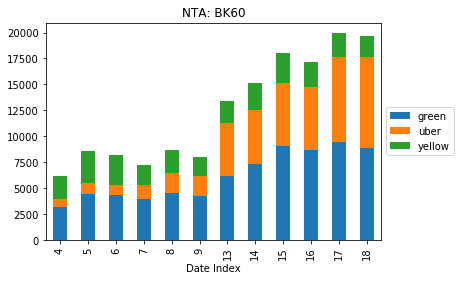

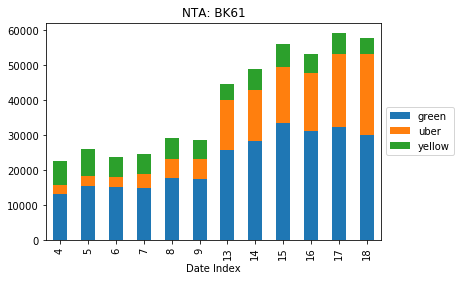

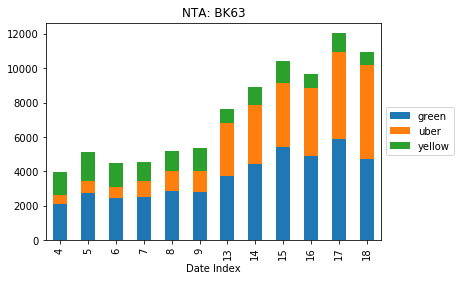

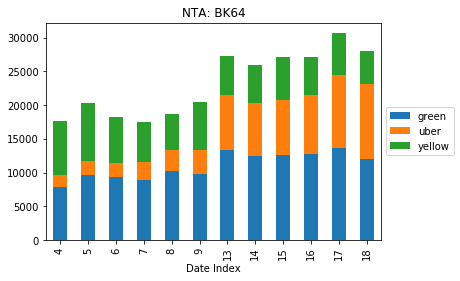

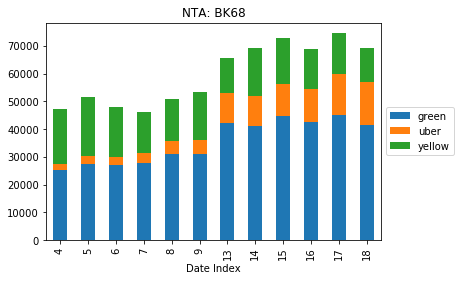

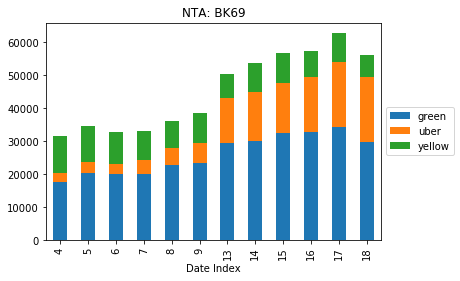

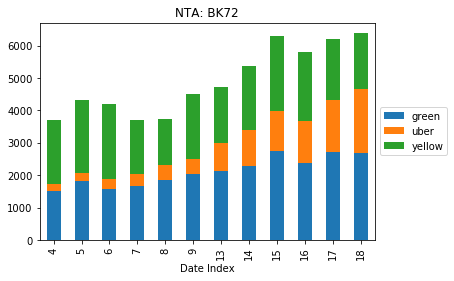

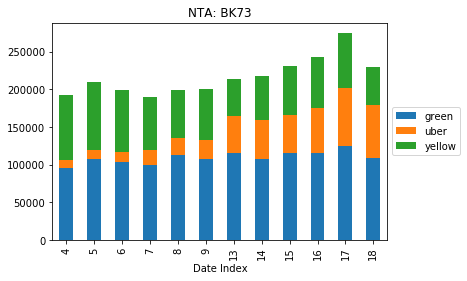

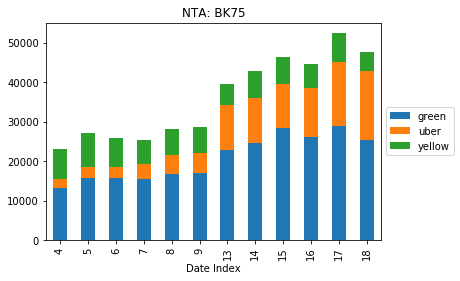

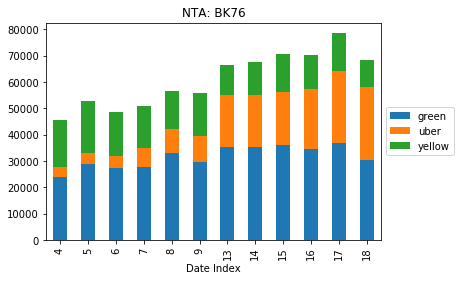

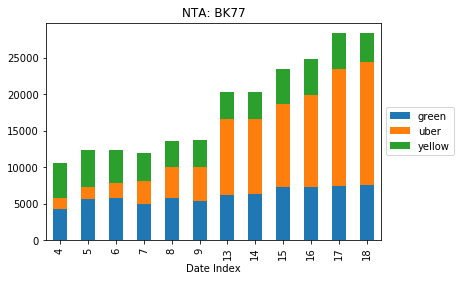

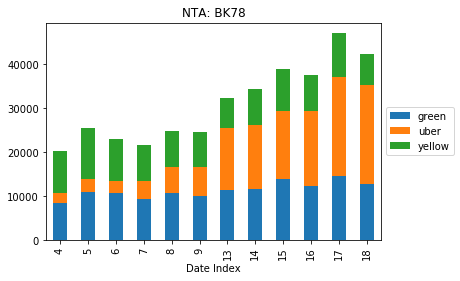

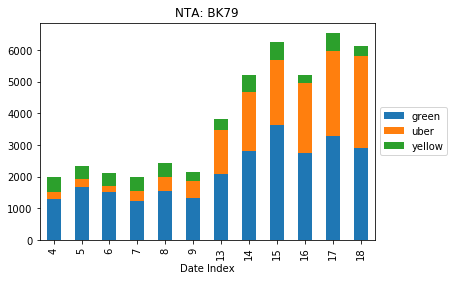

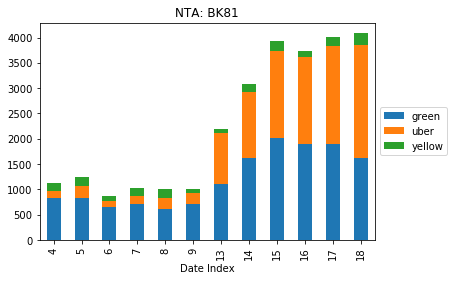

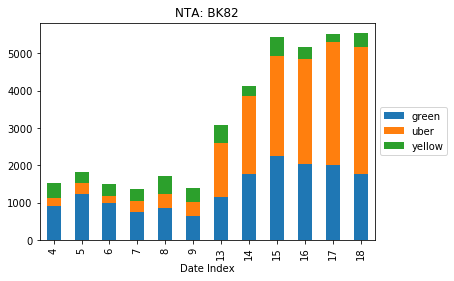

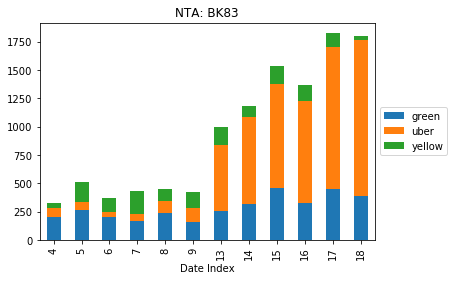

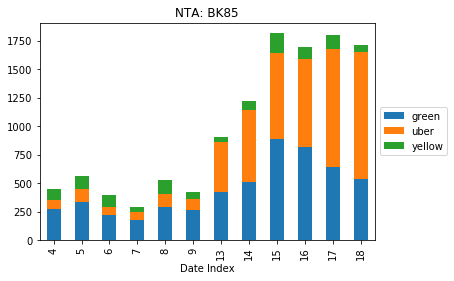

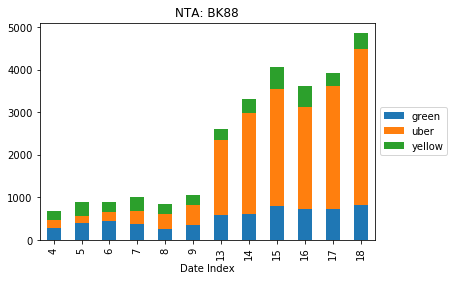

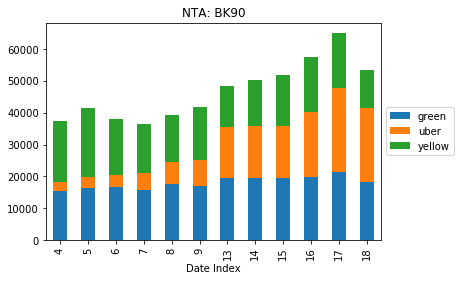

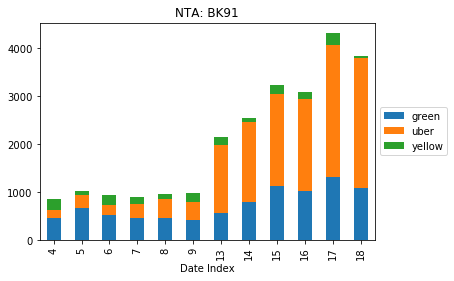

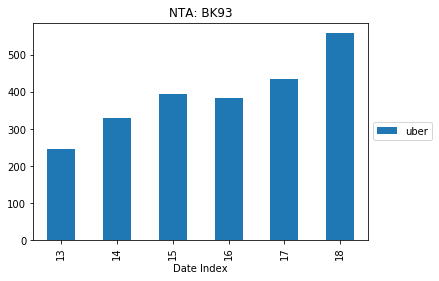

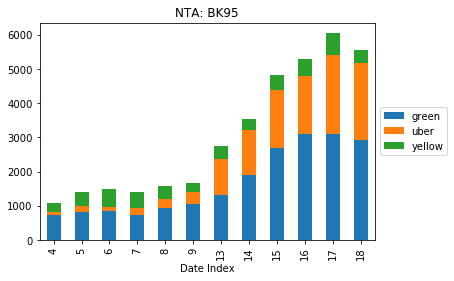

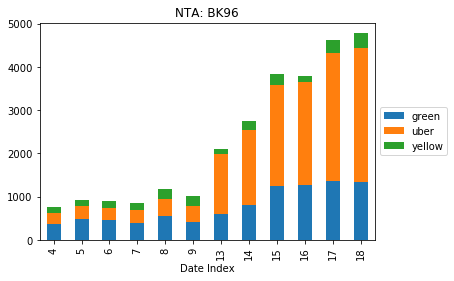

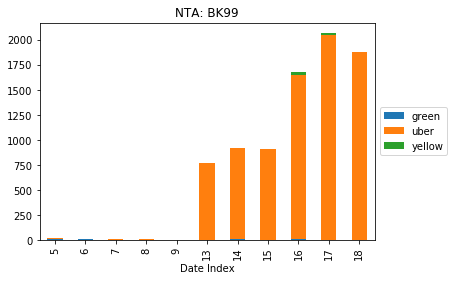

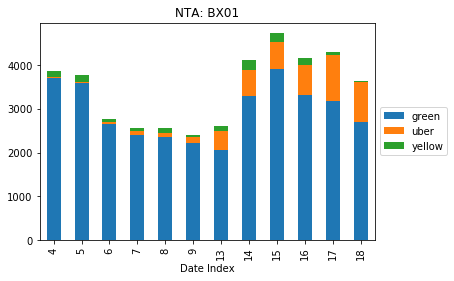

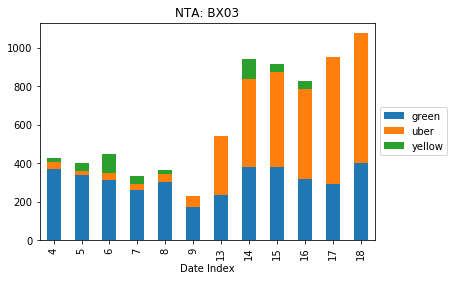

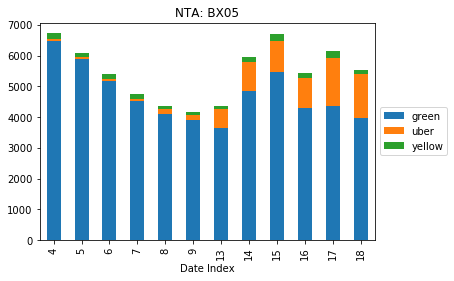

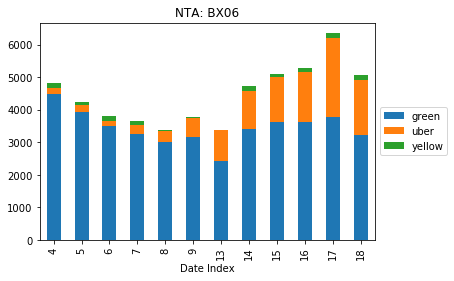

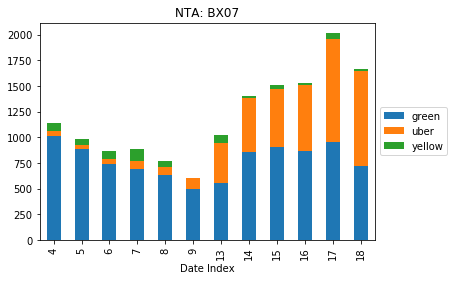

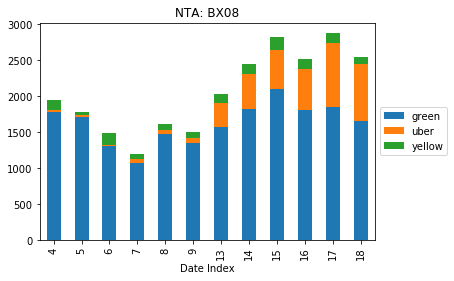

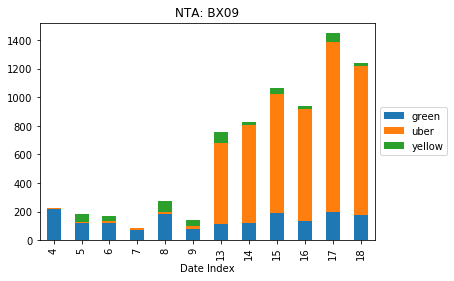

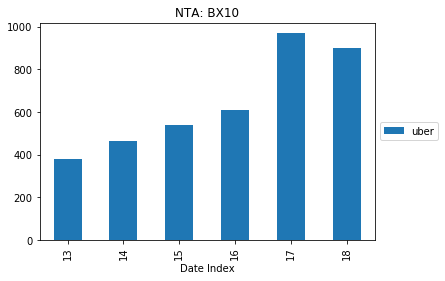

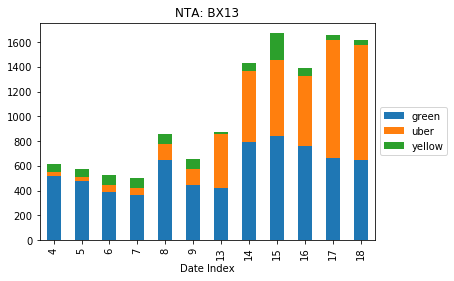

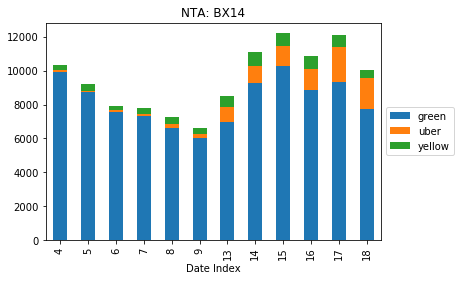

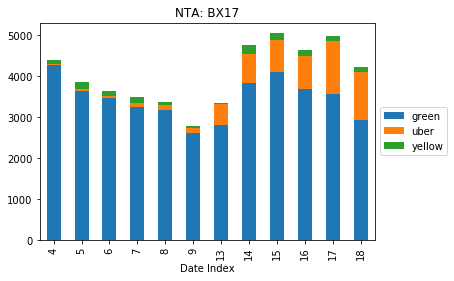

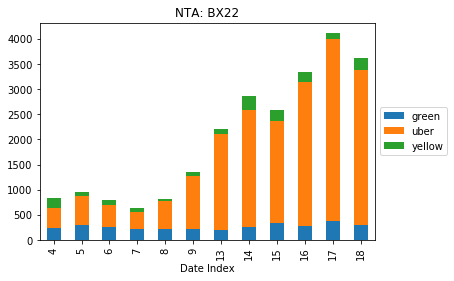

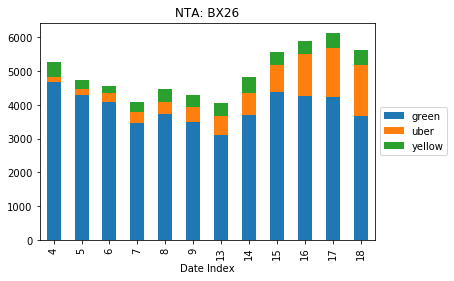

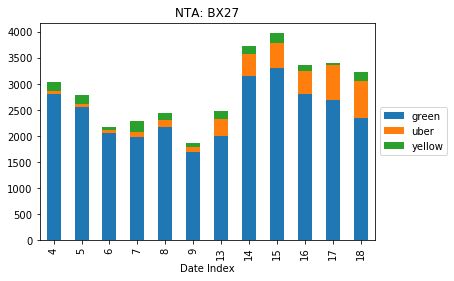

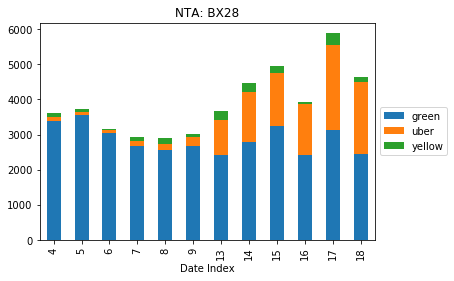

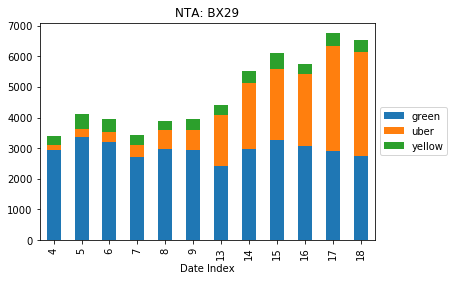

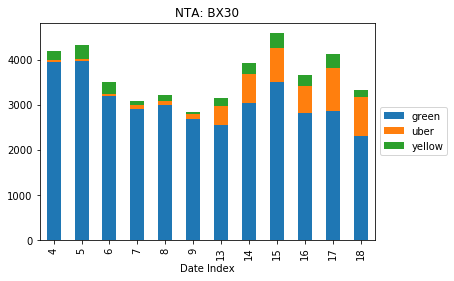

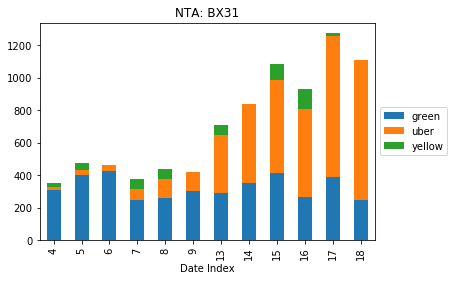

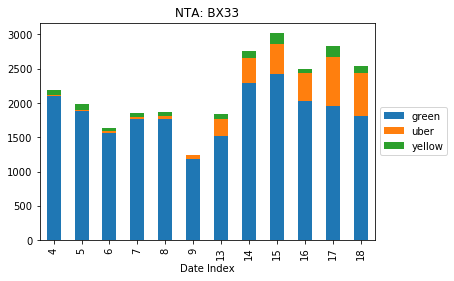

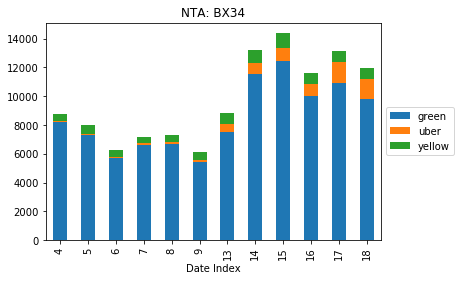

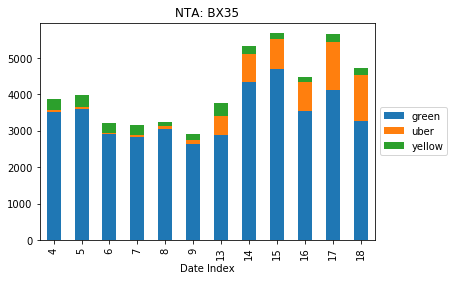

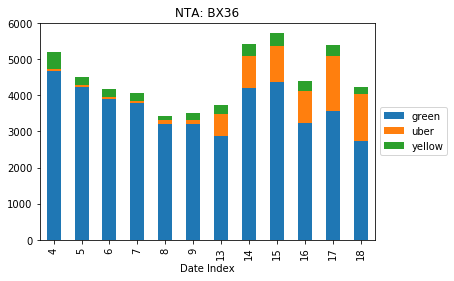

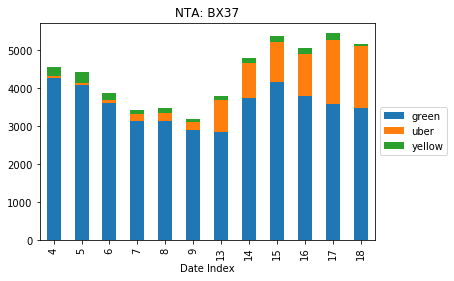

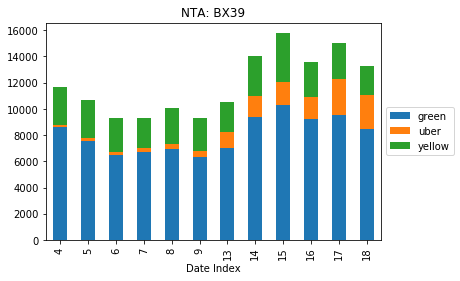

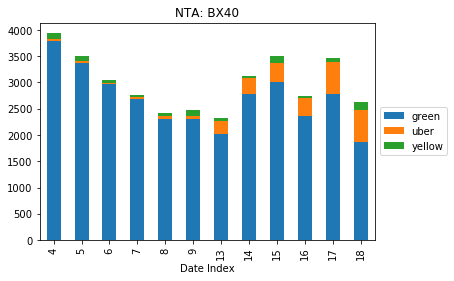

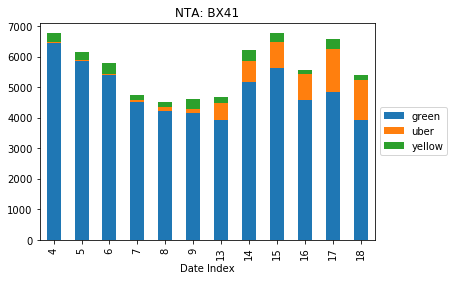

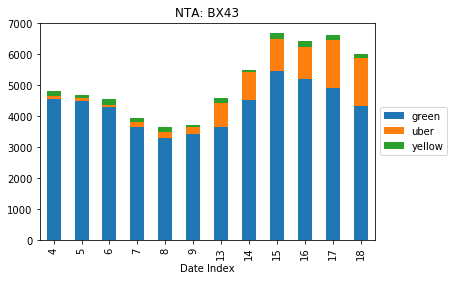

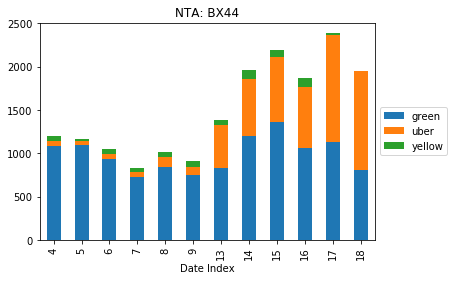

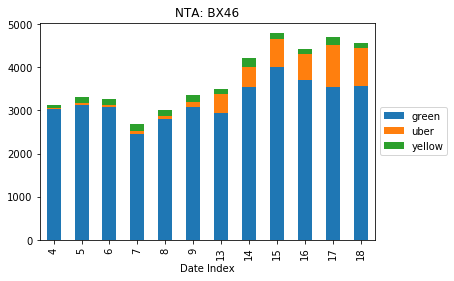

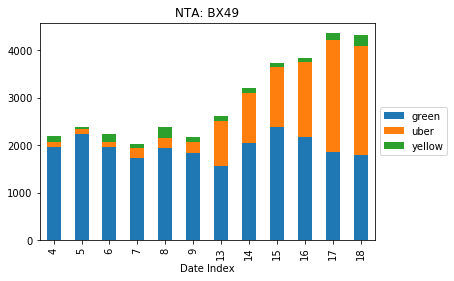

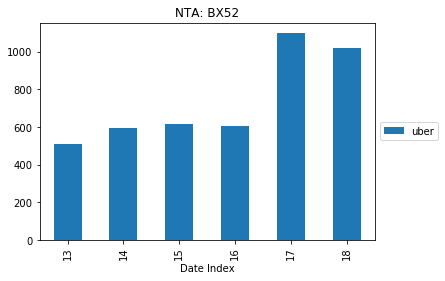

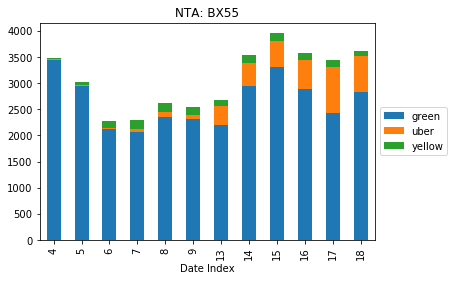

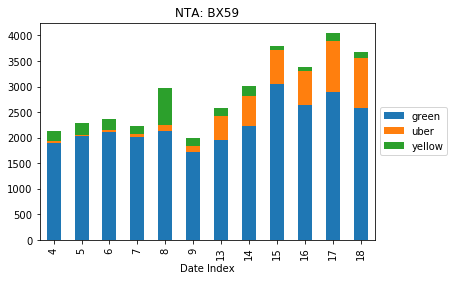

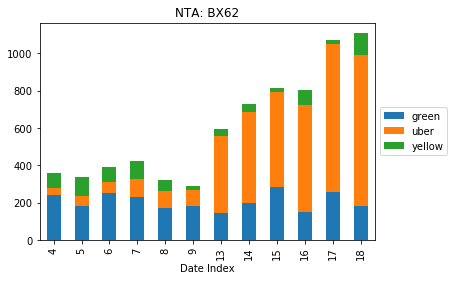

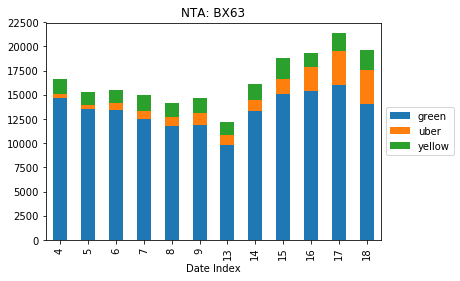

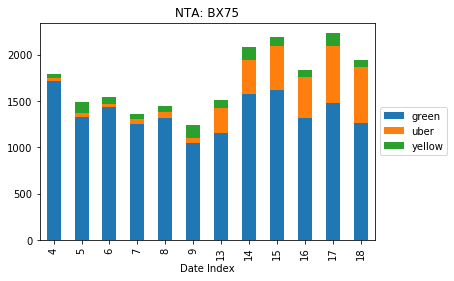

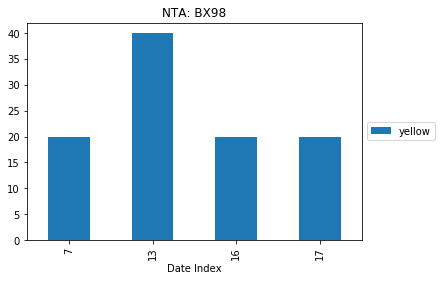

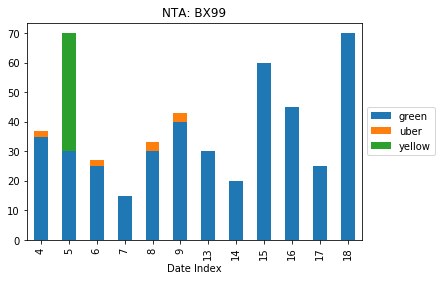

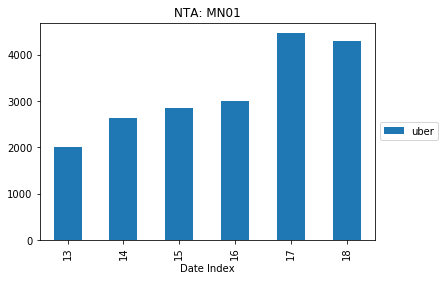

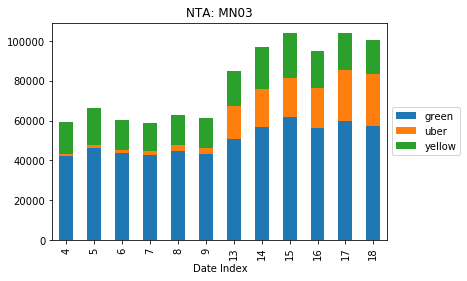

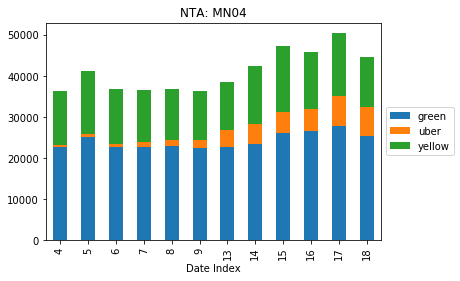

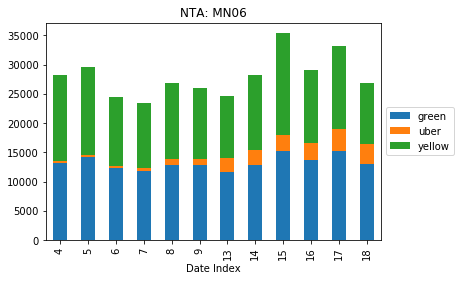

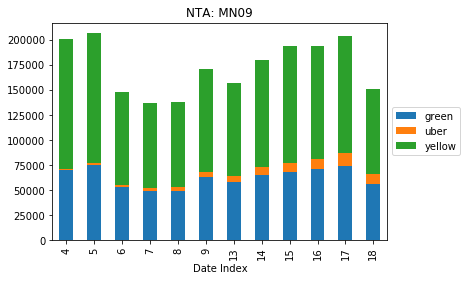

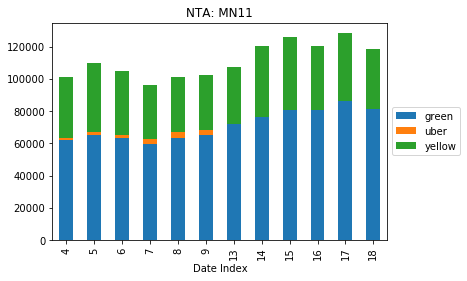

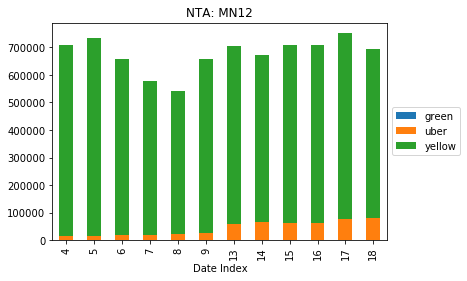

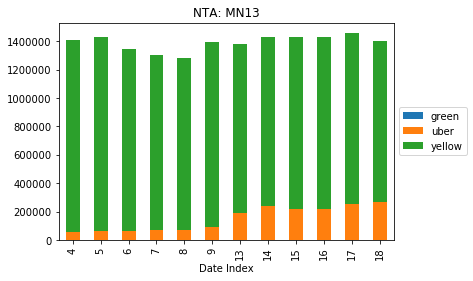

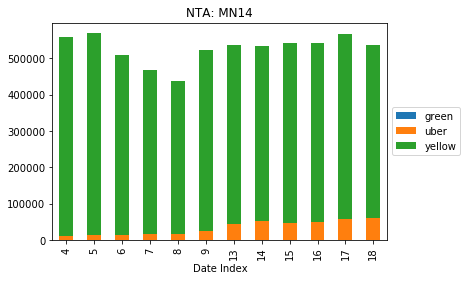

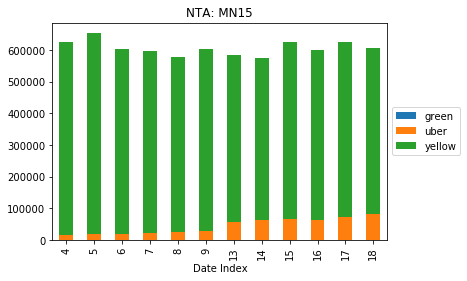

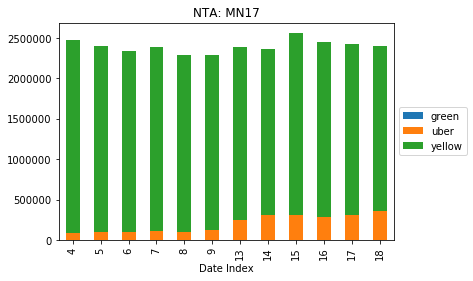

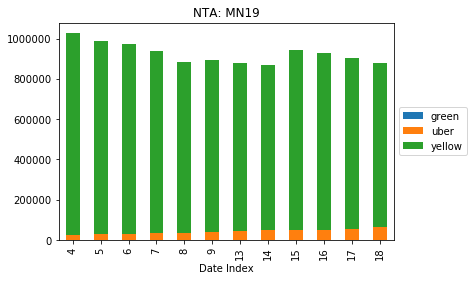

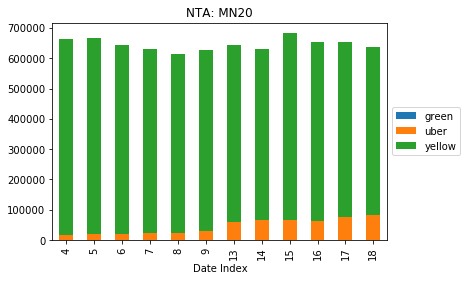

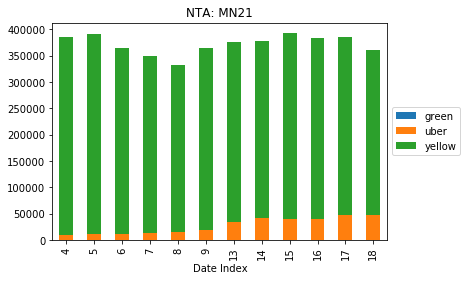

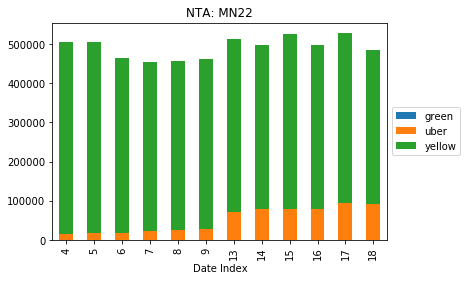

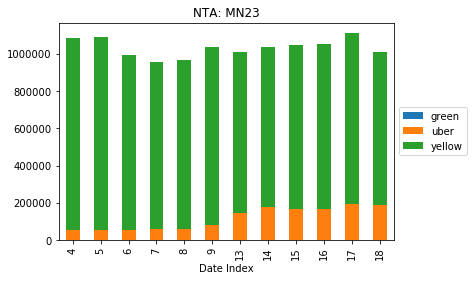

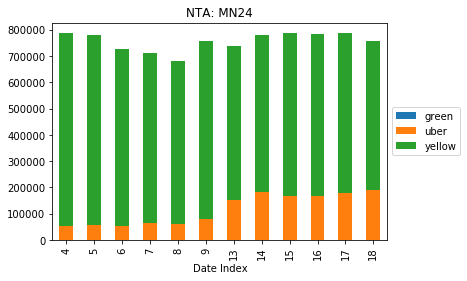

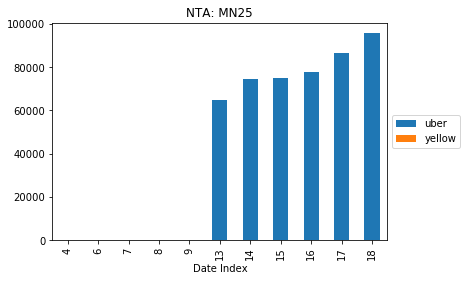

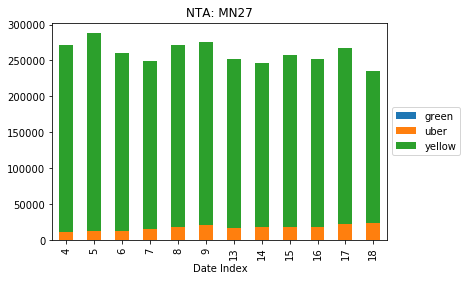

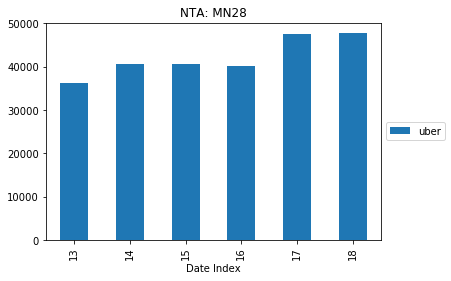

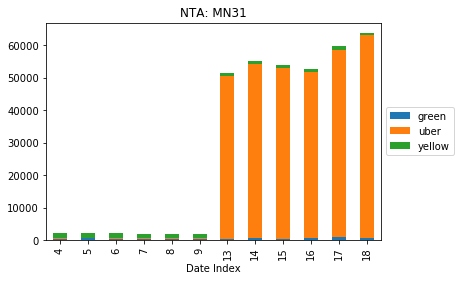

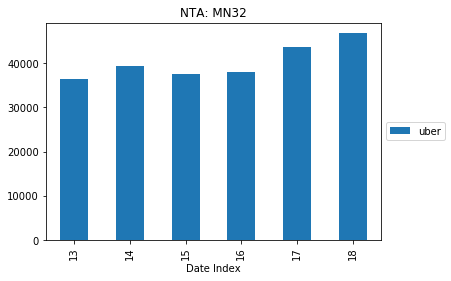

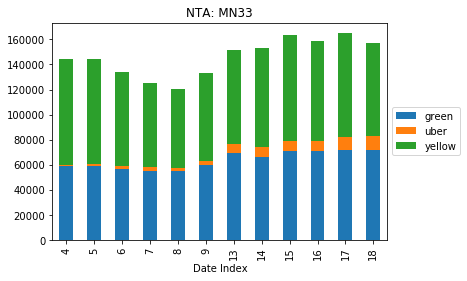

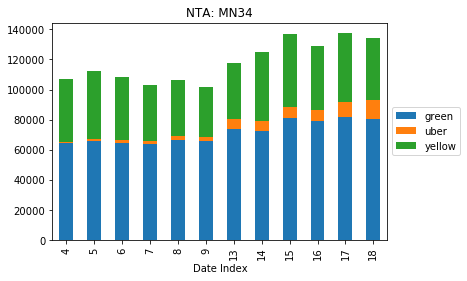

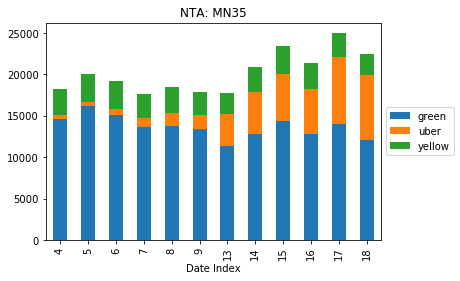

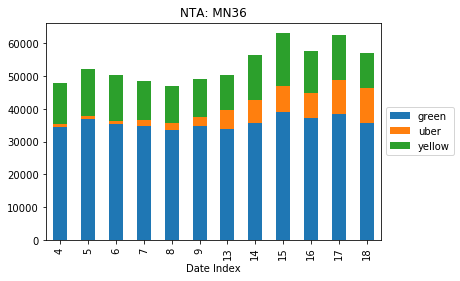

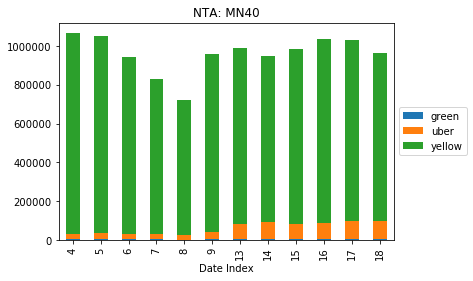

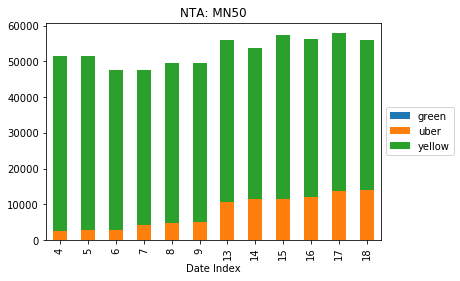

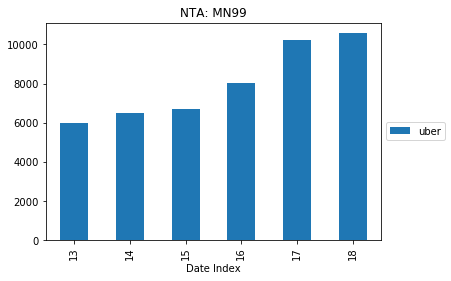

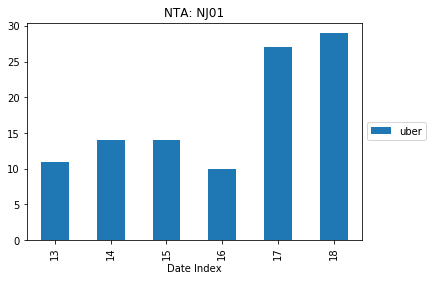

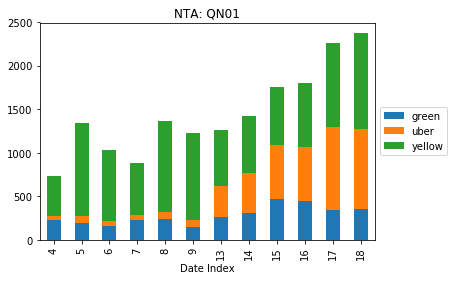

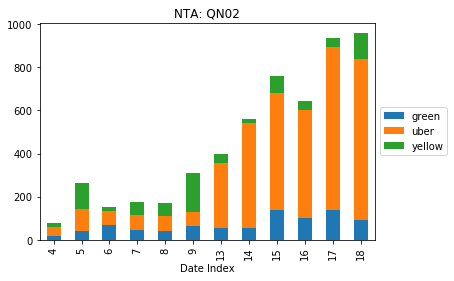

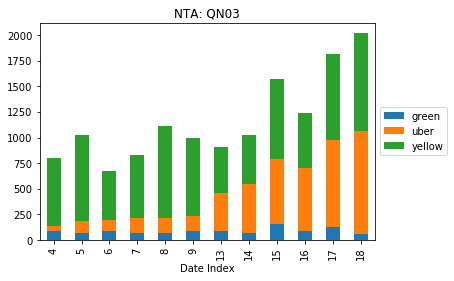

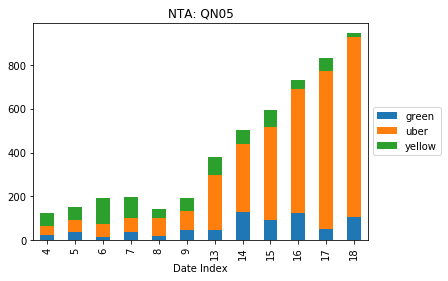

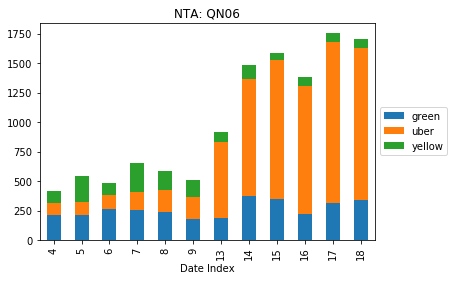

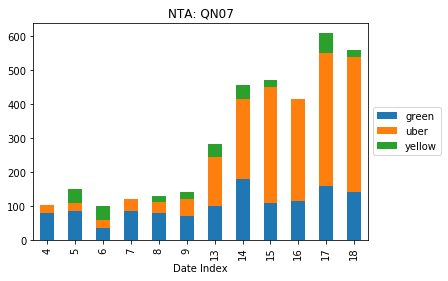

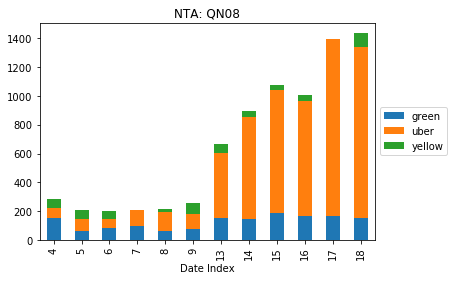

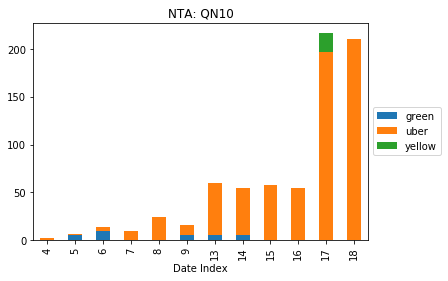

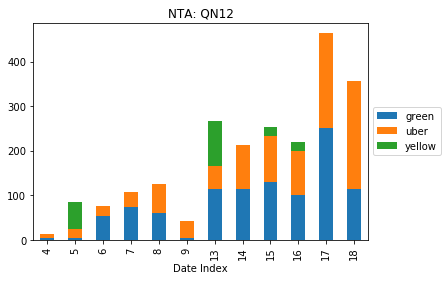

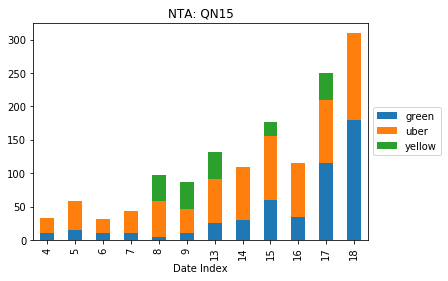

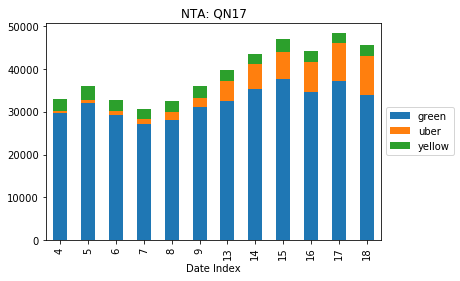

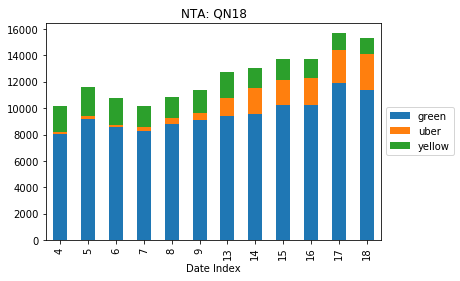

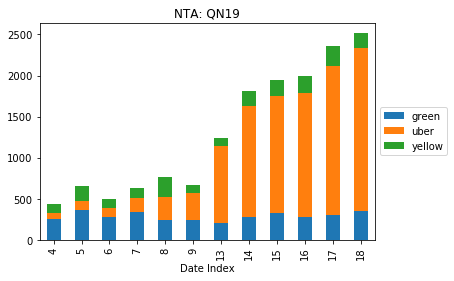

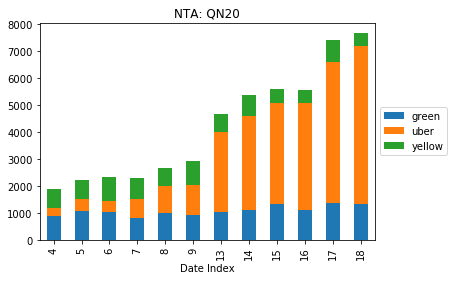

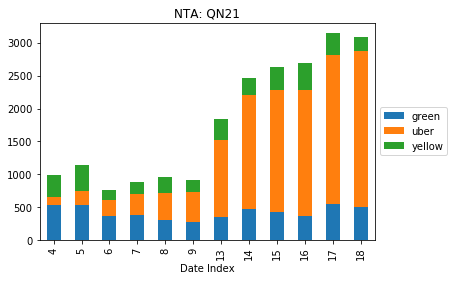

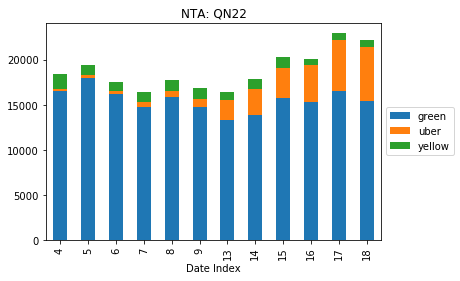

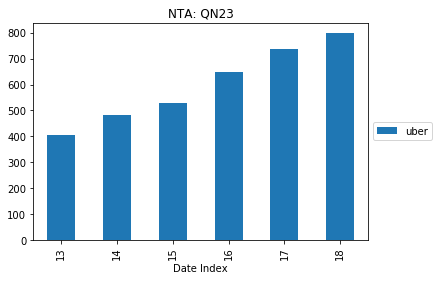

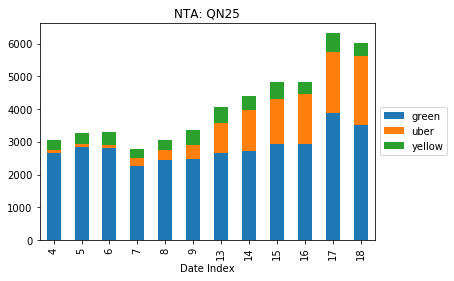

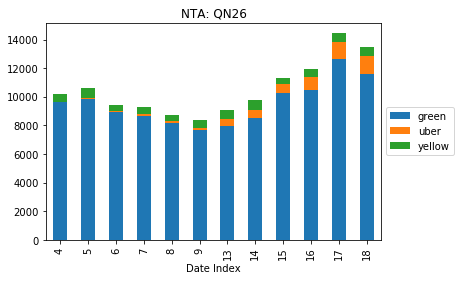

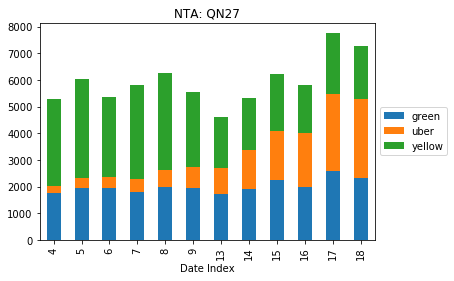

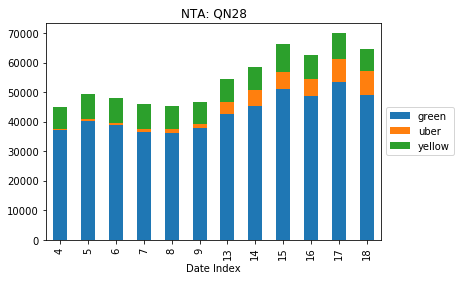

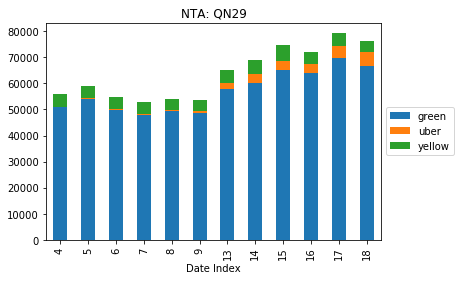

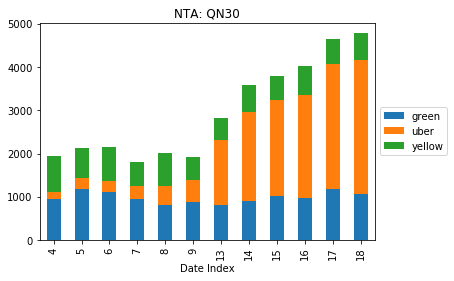

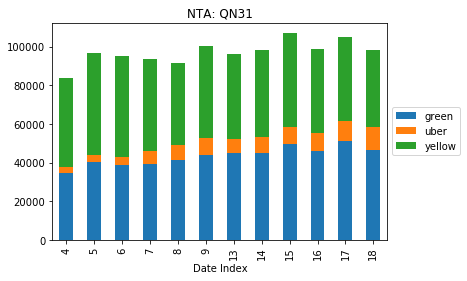

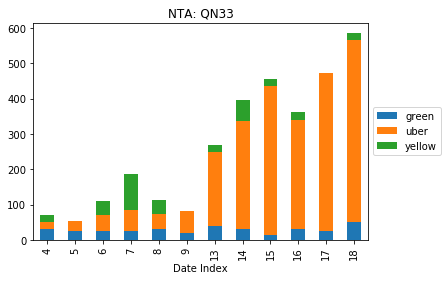

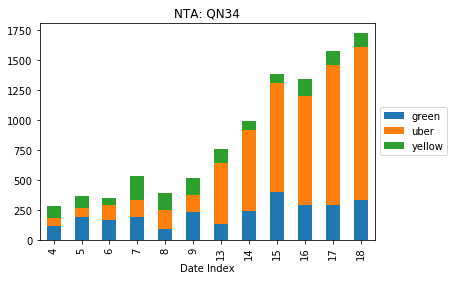

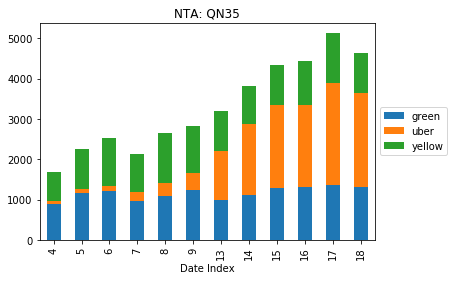

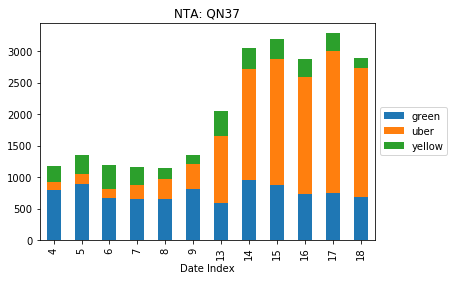

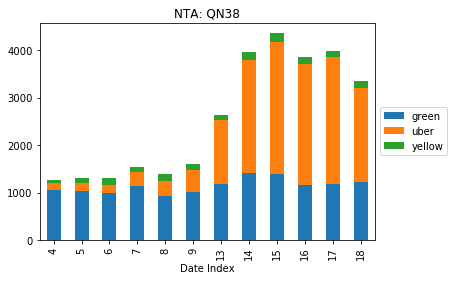

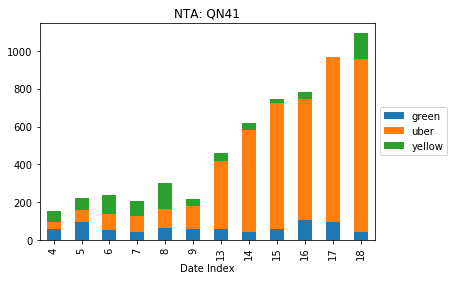

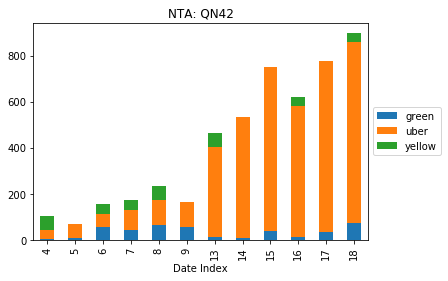

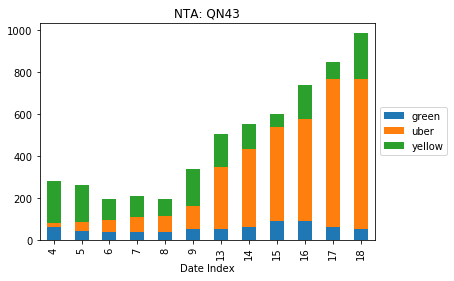

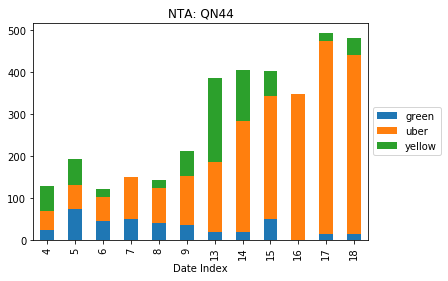

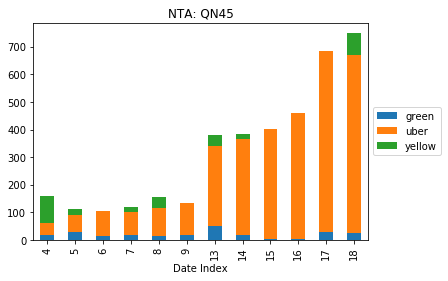

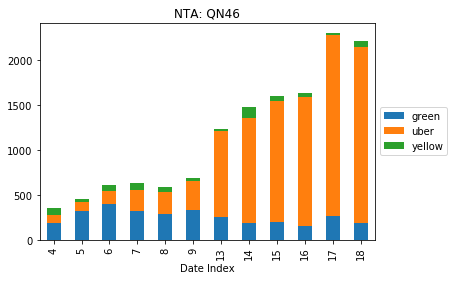

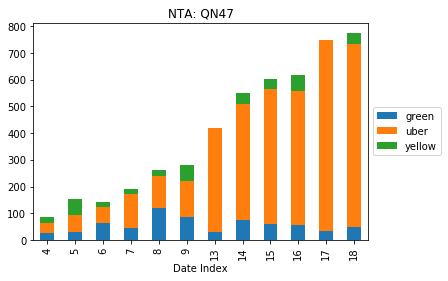

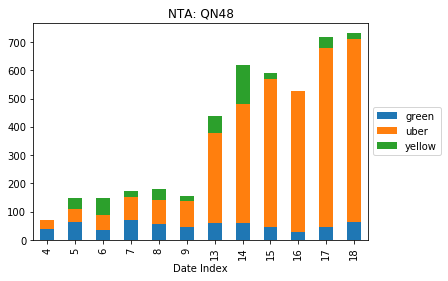

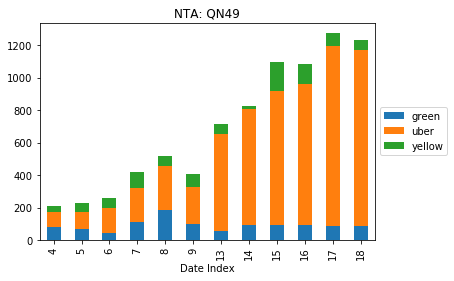

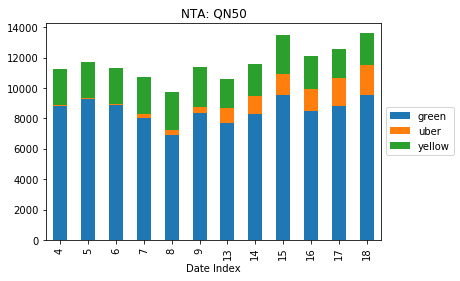

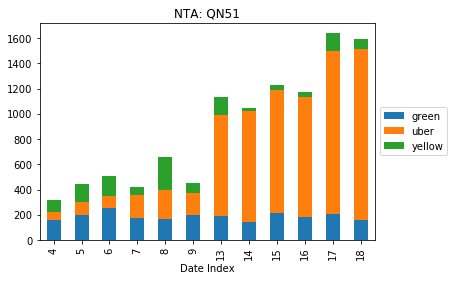

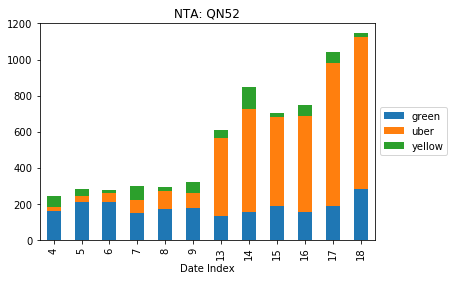

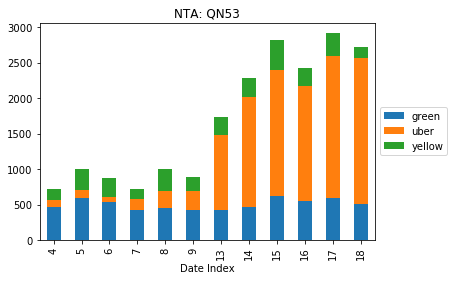

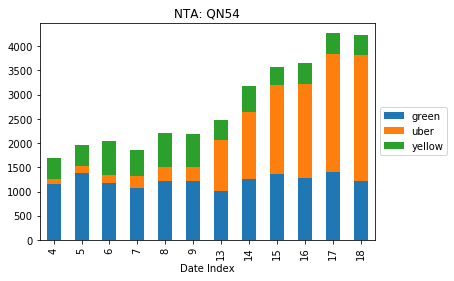

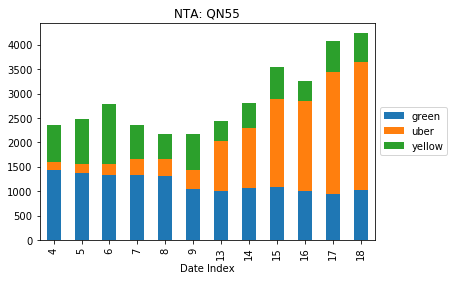

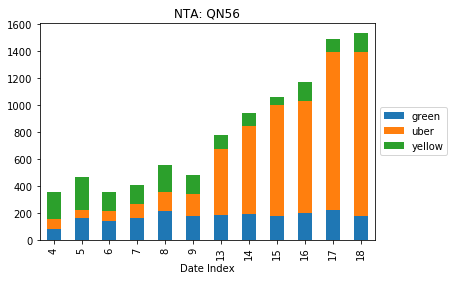

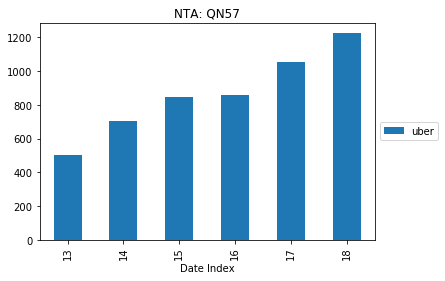

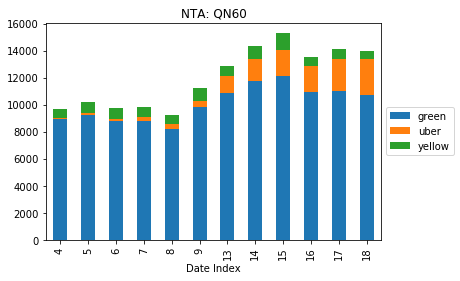

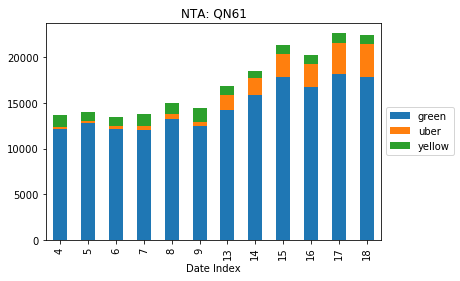

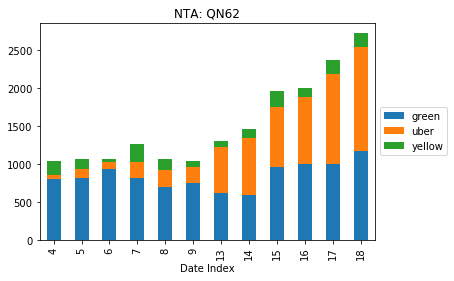

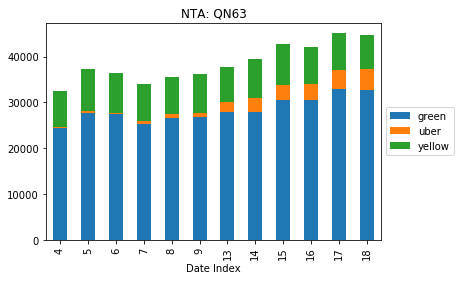

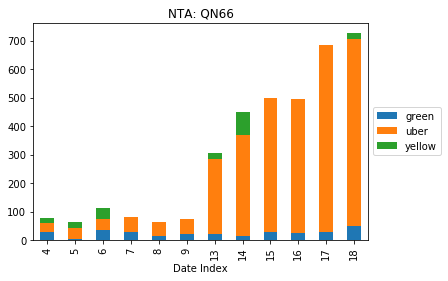

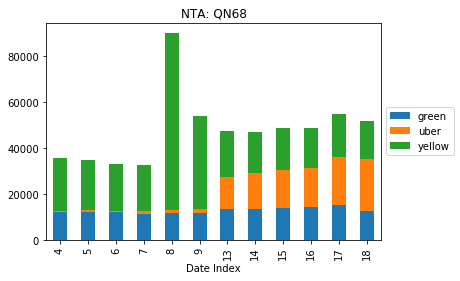

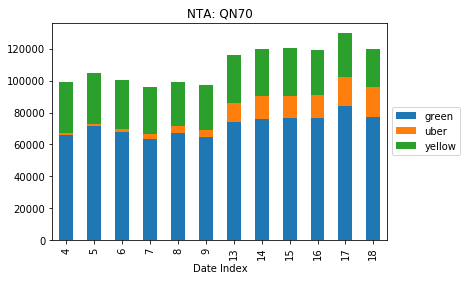

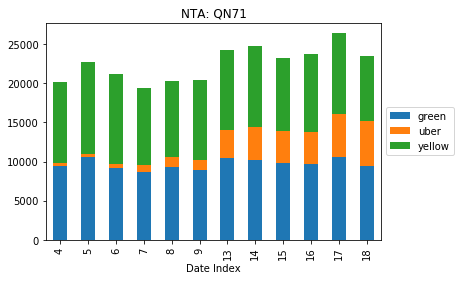

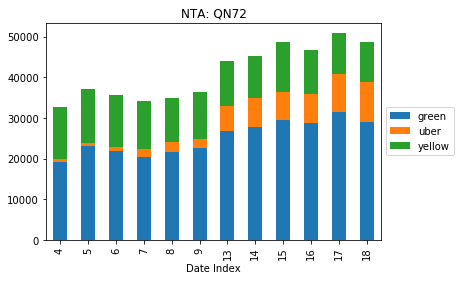

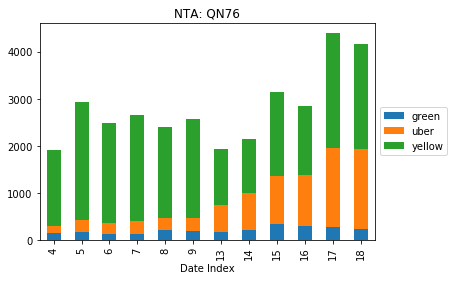

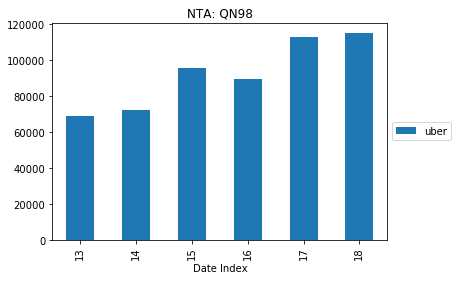

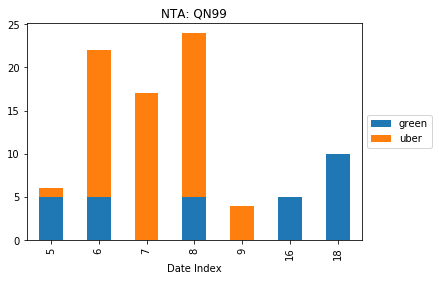

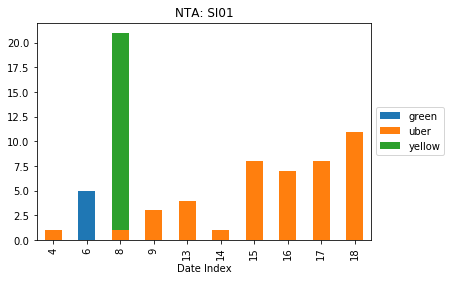

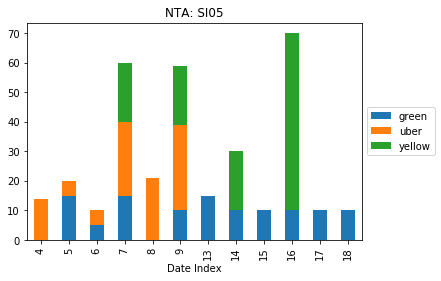

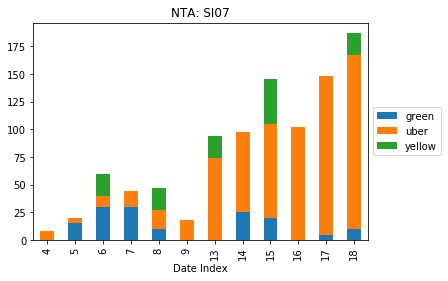

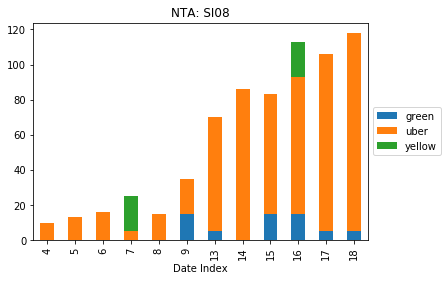

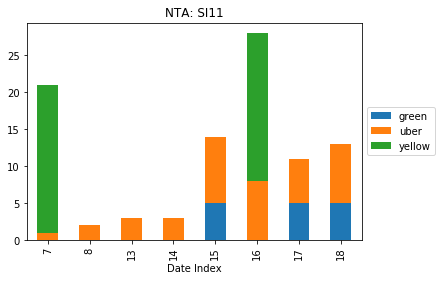

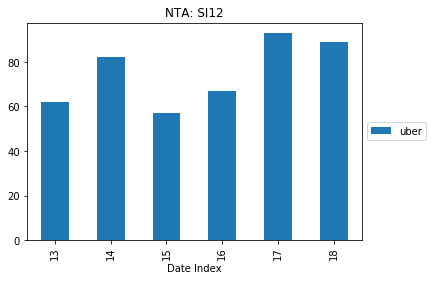

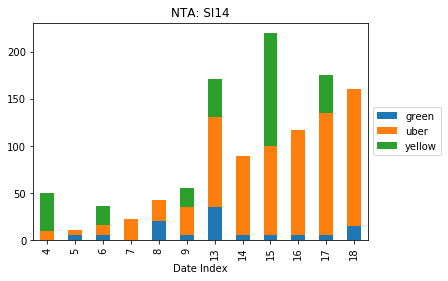

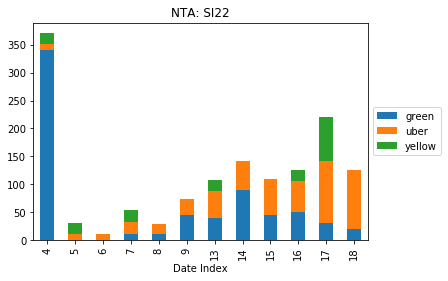

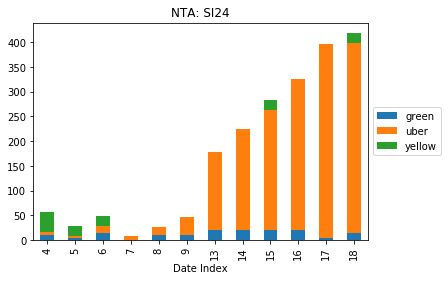

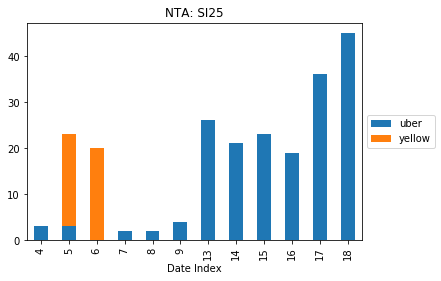

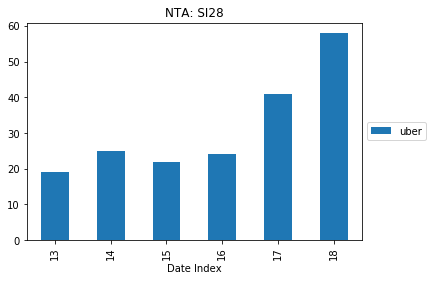

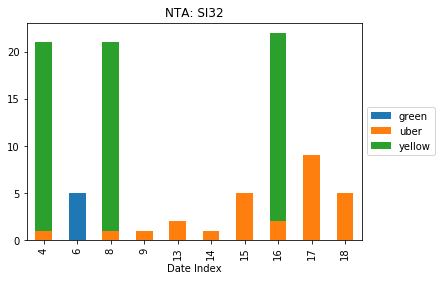

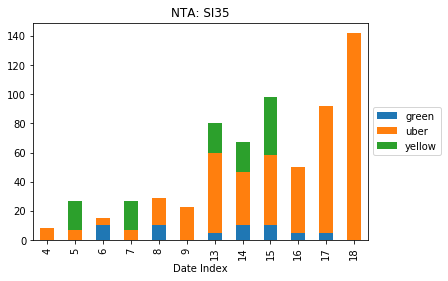

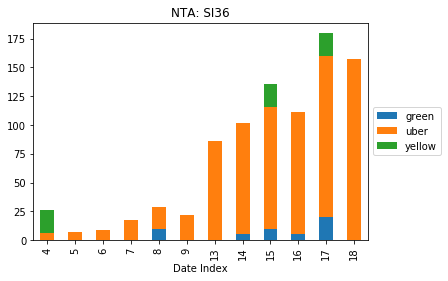

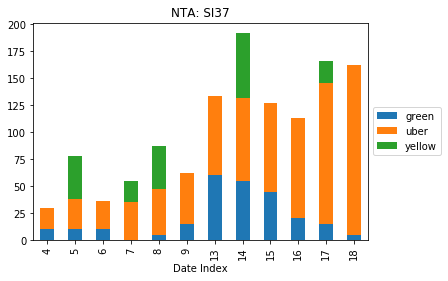

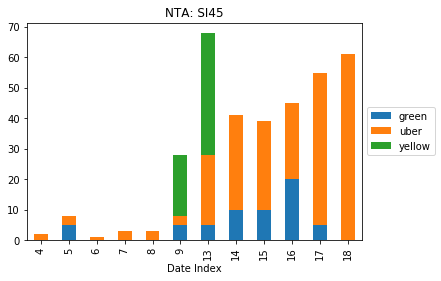

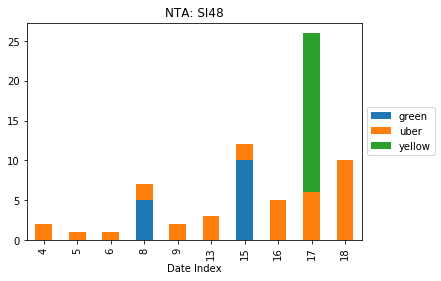

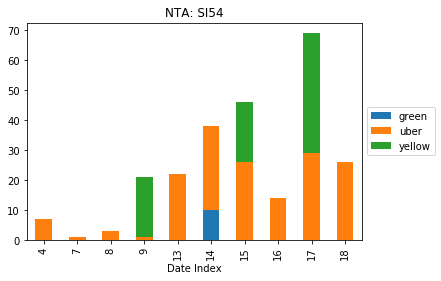

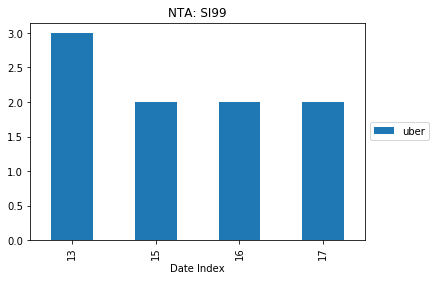

In [22]:
for nta_code in np.unique(df["NTA Code"]):
    df[df["NTA Code"]== nta_code].groupby(['Date Index', 'type'])['count'].sum().unstack().plot(title="NTA: "+nta_code, kind='bar', stacked=True)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.savefig("NTA: "+ nta_code+".png",dpi=500)
    plt.show()

In [23]:
df.head()

,Date Index,NTA Code,count,type
0,4,BK09,20735,green
1,4,BK17,5490,green
2,4,BK19,450,green
3,4,BK21,890,green
4,4,BK23,120,green


In [24]:
len(df)

6080

### Percent changes

In [38]:
# from first month, map from NTA to types to count
start_data = defaultdict(lambda : defaultdict(int))
start_df = df[df["Date Index"] == 4]
for i in range(len(start_df)):
    nta = start_df["NTA Code"].iloc[i]
    type_ = start_df["type"].iloc[i]
    count = start_df["count"].iloc[i]
    start_data[nta][type_] = count
    

In [40]:
# Last month    
end_data = defaultdict(lambda : defaultdict(int))
end_df = df[df["Date Index"] == 18]
for i in range(len(start_df)):
    nta = end_df["NTA Code"].iloc[i]
    type_ = end_df["type"].iloc[i]
    count = end_df["count"].iloc[i]
    end_data[nta][type_] = count
    

In [62]:
nta_data = []
uber_change_per_cap = []
green_change_per_cap = []
yellow_change_per_cap = []
for nta in good_df:
    if(nta in nta_pop_map):
        nta_data.append(nta)
        pop =  float(nta_pop_map[nta])

        uber_change = (end_data[nta]["uber"] - start_data[nta]["uber"])/pop
        green_change = (end_data[nta]["green"] - start_data[nta]["green"])/pop
        yellow_change = (end_data[nta]["yellow"] - start_data[nta]["yellow"])/pop

        uber_change_per_cap.append(uber_change)
        green_change_per_cap.append(green_change)
        yellow_change_per_cap.append(yellow_change)

In [65]:
per_cap_nta_data = {
    "NTA Code": nta_data,
    "Uber Change Per Capita": uber_change_per_cap,
    "Green Change Per Capita": green_change_per_cap,
    "Yellow Change Per Capita":yellow_change_per_cap,
}

In [66]:
change_per_cap_df = pd.DataFrame.from_dict(per_cap_nta_data)

In [67]:
change_per_cap_df.head()

,Green Change Per Capita,NTA Code,Uber Change Per Capita,Yellow Change Per Capita
0,-0.003570,BX08,0.021993,-0.001142
1,0.206811,BK64,0.475087,-0.159202
2,0.066423,BK63,0.124880,-0.014116
3,0.162646,BK61,0.200913,-0.024426
4,0.084422,BK60,0.119421,-0.004447


In [68]:
change_per_cap_df.to_csv("change_per_capita.csv")

In [69]:
end_data["MN40"]

defaultdict(int, {'green': 3885, 'uber': 94244, 'yellow': 867240})

In [70]:
start_data["MN40"]

defaultdict(int, {'green': 3700, 'uber': 26216, 'yellow': 1037660})

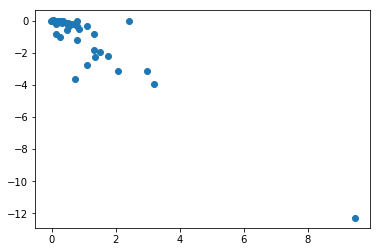

In [76]:
plt.scatter(change_per_cap_df["Uber Change Per Capita"],change_per_cap_df["Yellow Change Per Capita"])

In [79]:
np.corrcoef(change_per_cap_df["Uber Change Per Capita"],change_per_cap_df["Yellow Change Per Capita"])[0, 1]

-0.93810403378994311

### NTAs that increased by a factor of 2 in ride sharers

In [113]:
doubled_ntas = []
for nta in start_data:
    if(nta in nta_pop_map):
        total_start = start_data[nta]["uber"] + start_data[nta]["green"] + start_data[nta]["yellow"]
        total_end = end_data[nta]["uber"] + end_data[nta]["green"] + end_data[nta]["yellow"]
        if total_start*3 < total_end:
            doubled_ntas.append(nta)
            
        

In [114]:
len(doubled_ntas)

66

In [115]:
good_df = change_per_cap_df[(change_per_cap_df["Yellow Change Per Capita"] >= 0) & 
                  (change_per_cap_df["Green Change Per Capita"] >=0) &
                  (change_per_cap_df["Uber Change Per Capita"] > change_per_cap_df["Green Change Per Capita"]) & 
                  (change_per_cap_df["Uber Change Per Capita"] > change_per_cap_df["Yellow Change Per Capita"])
                           &
                    (change_per_cap_df["NTA Code"].isin(doubled_ntas))
                           ]

In [118]:
good_df.to_csv("NTAS_Uber_new_market.csv")

In [116]:
good_df

,Green Change Per Capita,NTA Code,Uber Change Per Capita,Yellow Change Per Capita
15,0.003077,QN19,0.058900,0.001846
18,0.000618,QN53,0.034725,0.000000
22,0.001071,QN33,0.026557,0.000000
23,0.004000,QN34,0.023046,0.000381
26,0.007721,BK58,0.051620,0.002471
44,0.003726,BK44,0.044376,0.000000
45,0.000246,BK46,0.067491,0.006897
52,0.002982,QN12,0.006290,0.000000
54,0.000000,QN10,0.007459,0.000000
56,0.000223,SI08,0.004586,0.000000


In [117]:
len(good_df)

28

In [126]:
demo_df.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [133]:
results = change_per_cap_df.join(demo_df)

In [135]:
demo_df.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [145]:
demo_df.columns

Index([u'nta_name', u'borough', u'nta_code', u'population', u'under_5_years',
       u'5-9_years', u'10-14_years', u'15-19_years', u'20-24_years',
       u'25-29_years', u'30-34_years', u'35-39_years', u'40-44_years',
       u'45-49_years', u'50-54_years', u'55-59_years', u'60-64_years',
       u'over_65_years', u'median_age', u'people_per_acre', u'households',
       u'less_than_10,000', u'10000_to_14999', u'15000_to_24999',
       u'25000_to_34999', u'35000_to_49999', u'50000_to_74999',
       u'75000_to_99999', u'100000_to_149999', u'150000_to_199999',
       u'200000_or_more', u'median_income', u'mean_income'],
      dtype='object')

In [165]:
big = results[results["Uber Change Per Capita"]<1]

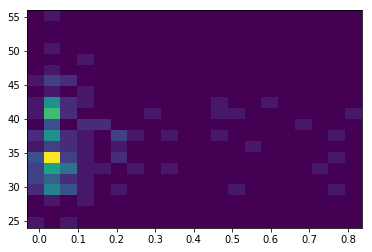

In [169]:
plt.hist2d(big["Uber Change Per Capita"], big["median_age"], bins=20);

(array([  5.,  18.,  23.,  24.,  15.,  15.,  12.,  11.,  13.,   5.,   9.,
          5.,   5.,   4.,   4.,   2.,   1.,   0.,   1.,   3.,   0.,   0.,
          0.,   0.,   1.]),
 array([  13354.  ,   18114.96,   22875.92,   27636.88,   32397.84,
          37158.8 ,   41919.76,   46680.72,   51441.68,   56202.64,
          60963.6 ,   65724.56,   70485.52,   75246.48,   80007.44,
          84768.4 ,   89529.36,   94290.32,   99051.28,  103812.24,
         108573.2 ,  113334.16,  118095.12,  122856.08,  127617.04,  132378.  ]),
 <a list of 25 Patch objects>)

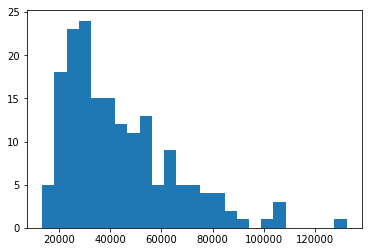

In [178]:
plt.hist(results["population"],bins=25)

In [179]:
len(results)

176